# Exploratory Analysis (Nina)

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the raw data

In [2]:
ok=pd.read_csv('../raw_data/okcupid_profiles.csv')

In [7]:
ok.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  \
0         asian, white  ...   
1                white  ...   
2                  NaN  ...   
3                white  ...   
4  asian, black, other  ...   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  \
0  the way i look. i am a six foot half asian, ha...   
1                                                NaN   
2  my large jaw and large glasses are the physica...   
3                  socially awkward but i do my best   
4            i smile a lot and my inquisitive nature   

                                              essay4  \
0  books: absurdistan, the republic, of mice and ...   
1  i am die hard christopher moore fan. i don't r...   
2  okay this is where the cultural matrix gets so...   
3  bataille, celine, beckett. . . lynch, jarmusch...   
4  music: bands, rappers, musicians at the moment...   

                                              essay5  \
0                  food. water. cell phone. shelter.   
1  delicious porkness in all of its glories. my b...   
2  movement conversation creation contemplation t...   
3                                                NaN   
4                                                NaN   

                        essay6  \
0  duality and humorous things   
1                          NaN   
2                          NaN   
3   cats and german philosophy   
4                          NaN   

                                              essay7  \
0  trying to find someone to hang out with. i am ...   
1                                                NaN   
2  viewing. listening. dancing. talking. drinking...   
3                                                NaN   
4                                                NaN   

                                              essay8  \
0  i am new to california and looking for someone...   
1  i am very open and will share just about anyth...   
2  when i was five years old, i was known as "the...   
3                                                NaN   
4                                                NaN   

                                              essay9  
0  you want to be swept off your feet! you are ti...  
1    

In [8]:
ok.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [9]:
ok.describe()

age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000

## Checking missing data

In [10]:
ok.isna().sum().sort_values(ascending=False)*100/ok.shape[0]

offspring      59.321723
diet           40.694959
religion       33.740366
pets           33.231575
essay8         32.070530
drugs          23.487806
essay6         22.972342
essay9         21.023922
essay7         20.770360
essay3         19.143896
sign           18.443266
essay5         18.099623
essay4         17.577486
essay2         16.077803
job            13.675641
essay1         12.631368
education      11.056618
ethnicity       9.475194
smokes          9.194942
essay0          9.154906
body_type       8.834618
drinks          4.979482
speaks          0.083408
height          0.005005
status          0.000000
location        0.000000
last_online     0.000000
income          0.000000
orientation     0.000000
sex             0.000000
age             0.000000
dtype: float64

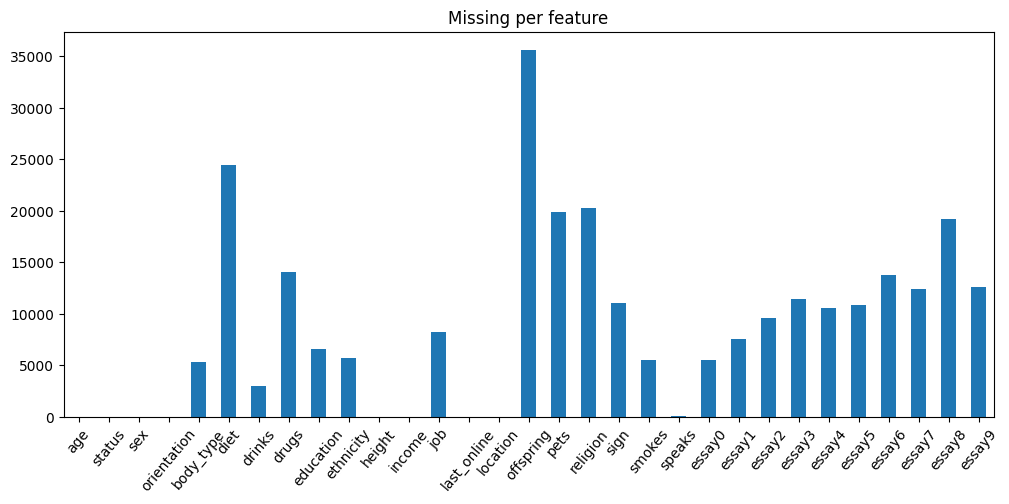

In [14]:
plt.figure(figsize=(12, 5))
ok.isna().sum().plot(kind="bar")
plt.xticks(rotation=50)
plt.title("Missing per feature")
plt.show();

## Some useful functions

In [43]:
def pertentage_of_unique(data: pd.DataFrame, col: str):
    return round(data.groupby(col)[col].count().sort_values(ascending=False)*100/data.shape[0], 2)

In [44]:
def plot_all(data, columns, vc, hc, figsize):
    i = 1
    plt.figure(figsize=figsize)
    for col in columns:
        plt.subplot(vc,hc,i)
        plt.title(col)
        sns.histplot(data=data, y=col)
        i+=1
    plt.subplots_adjust(wspace=0.2, hspace=.3)
    plt.show()

In [45]:
def get_pair_counts(data, columns):
    cache = {}
    hm_df = pd.DataFrame(columns=columns)
    for col1 in columns:
        hm_s = pd.Series(index=columns, dtype=int)
        for col2 in columns:
            cache_key = f"{col1}_{col2}"
            if col1 == col2:
                hm_s[col2] = len(data[data[col2]==1].index)
            else:
                if cache_key in cache.keys():
                    hm_s[col2] = cache[cache_key]
                else:
                    hm_s[col2] = len(data[(data[col1]==1) & data[col2]==1].index)
                    cache[cache_key] = hm_s[col2]
                    cache[f"{col2}_{col1}"] = hm_s[col2]
        hm_df[col1] = hm_s
    return hm_df

In [8]:
def plot_heatmap(data, columns, figsize, mask):
    plt.figure(figsize=figsize)
    sns.heatmap(get_pair_counts(data, columns), annot=True, mask=mask, fmt=".0f")
    plt.show()

## Data Visualization

### Continuous variables (age, height, income)

age
26     6.21
27     6.15
28     5.98
25     5.89
29     5.50
24     5.41
30     5.25
31     4.56
23     4.32
32     4.32
33     3.68
22     3.23
34     3.17
35     2.93
36     2.64
37     2.38
38     2.22
21     2.14
39     1.96
42     1.79
40     1.72
41     1.63
20     1.59
43     1.43
44     1.18
45     1.07
19     1.02
46     0.96
47     0.88
48     0.80
49     0.77
50     0.73
51     0.58
52     0.57
18     0.52
56     0.45
54     0.45
55     0.44
57     0.43
53     0.42
59     0.37
58     0.33
60     0.33
61     0.29
62     0.28
63     0.23
64     0.19
65     0.18
66     0.18
67     0.11
68     0.10
69     0.05
109    0.00
110    0.00
Name: age, dtype: float64


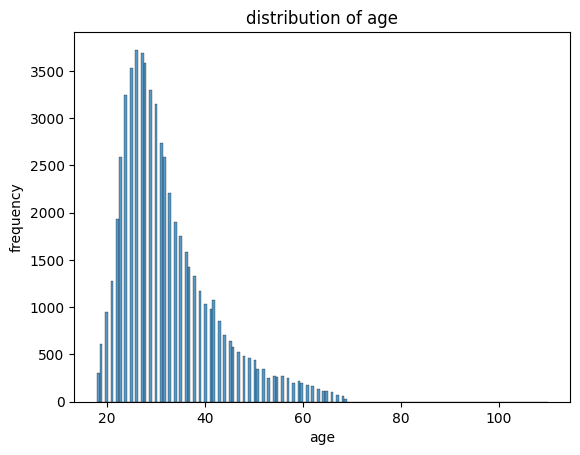

height
70.0    10.13
68.0     9.09
67.0     8.93
72.0     8.87
69.0     8.64
71.0     8.05
66.0     7.94
64.0     6.45
65.0     6.33
73.0     4.70
63.0     4.62
74.0     4.25
62.0     3.74
75.0     2.31
61.0     1.82
60.0     1.32
76.0     1.31
77.0     0.47
59.0     0.35
78.0     0.22
79.0     0.10
58.0     0.09
80.0     0.05
95.0     0.03
57.0     0.03
83.0     0.02
82.0     0.02
81.0     0.02
36.0     0.02
84.0     0.02
56.0     0.01
55.0     0.01
53.0     0.01
94.0     0.01
91.0     0.01
54.0     0.01
37.0     0.00
88.0     0.00
43.0     0.00
48.0     0.00
50.0     0.00
90.0     0.00
87.0     0.00
86.0     0.00
85.0     0.00
92.0     0.00
93.0     0.00
89.0     0.00
8.0      0.00
4.0      0.00
6.0      0.00
9.0      0.00
26.0     0.00
42.0     0.00
47.0     0.00
49.0     0.00
51.0     0.00
3.0      0.00
52.0     0.00
1.0      0.00
Name: height, dtype: float64


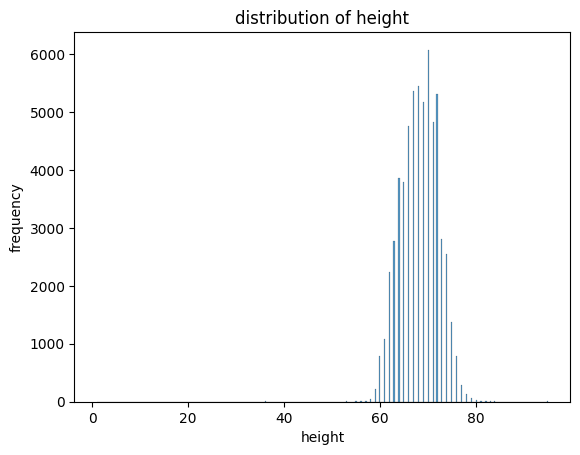

income
-1          80.81
 20000       4.92
 100000      2.70
 80000       1.85
 30000       1.75
 40000       1.68
 50000       1.63
 60000       1.23
 70000       1.18
 150000      1.05
 1000000     0.87
 250000      0.25
 500000      0.08
Name: income, dtype: float64


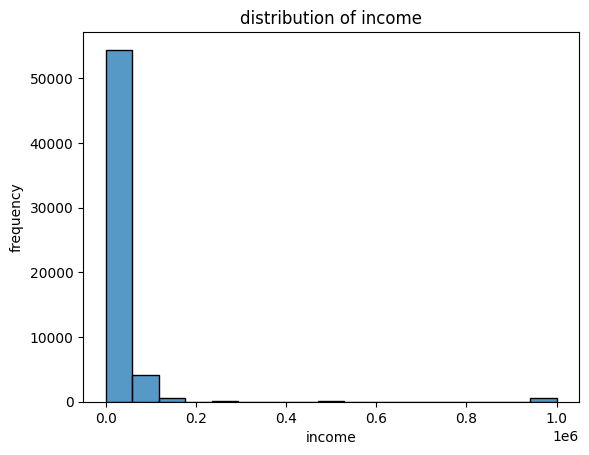

In [113]:
for feature in ok[['age', 'height', 'income']]:
    print(pertentage_of_unique(ok, feature))
    sns.histplot(data=ok, x=feature)
    plt.title(f'distribution of {feature}')
    plt.ylabel('frequency')
    plt.show();

### Discrete Variables - with fewer categories

status
single            92.91
seeing someone     3.44
available          3.11
married            0.52
unknown            0.02
Name: status, dtype: float64


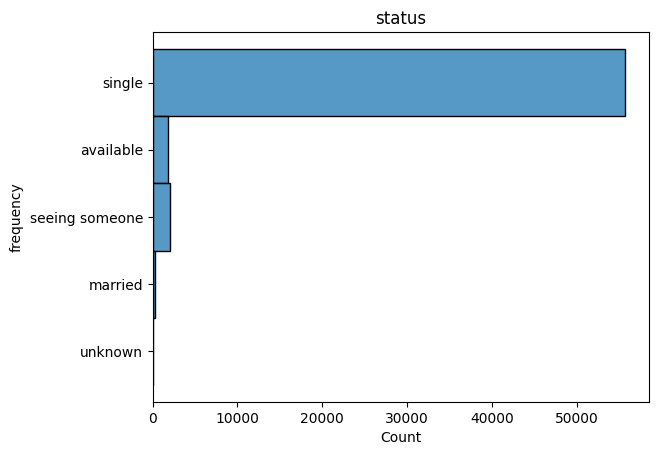

sex
m    59.77
f    40.23
Name: sex, dtype: float64


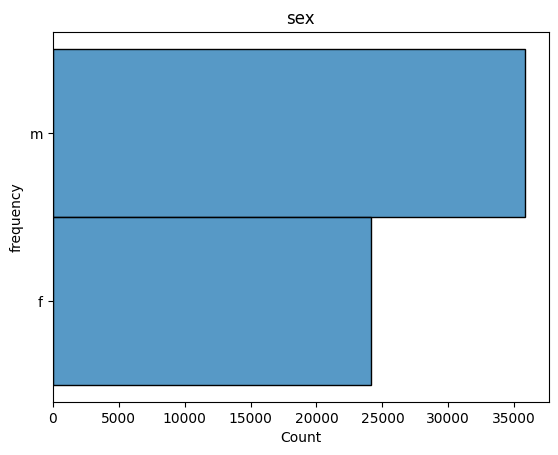

orientation
straight    86.09
gay          9.30
bisexual     4.62
Name: orientation, dtype: float64


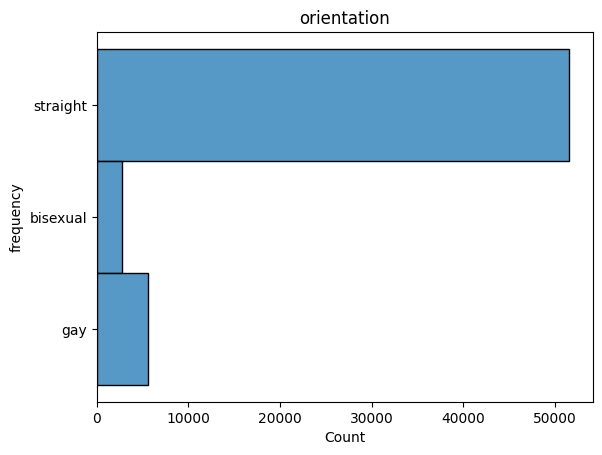

body_type
average           24.44
fit               21.20
athletic          19.72
thin               7.86
curvy              6.55
a little extra     4.39
skinny             2.96
full figured       1.68
overweight         0.74
jacked             0.70
used up            0.59
rather not say     0.33
Name: body_type, dtype: float64


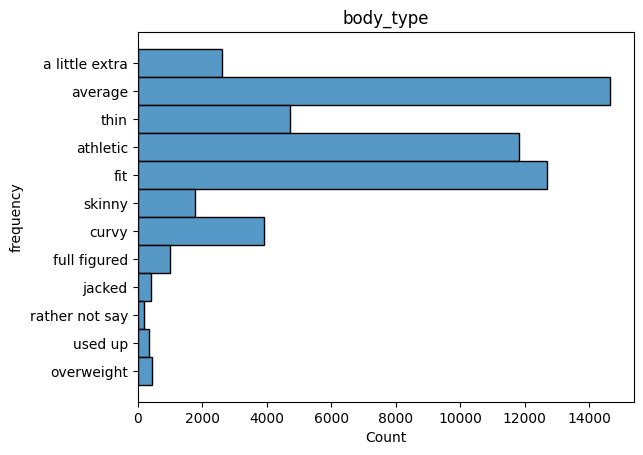

diet
mostly anything        27.67
anything               10.31
strictly anything       8.53
mostly vegetarian       5.75
mostly other            1.68
strictly vegetarian     1.46
vegetarian              1.11
strictly other          0.75
mostly vegan            0.56
other                   0.55
strictly vegan          0.38
vegan                   0.23
mostly kosher           0.14
mostly halal            0.08
strictly halal          0.03
strictly kosher         0.03
halal                   0.02
kosher                  0.02
Name: diet, dtype: float64


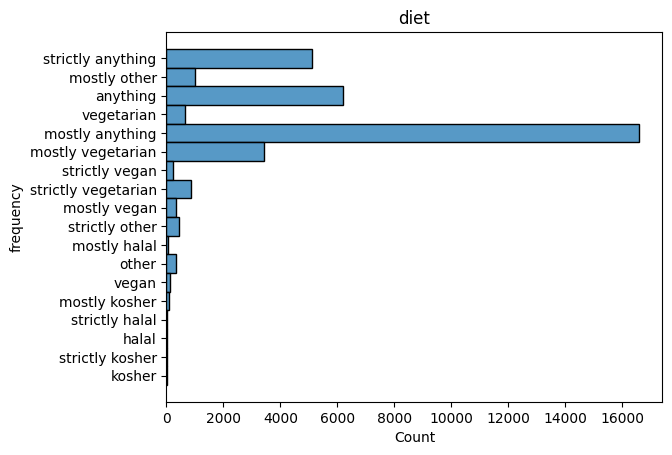

drinks
socially       69.70
rarely          9.94
often           8.61
not at all      5.45
very often      0.79
desperately     0.54
Name: drinks, dtype: float64


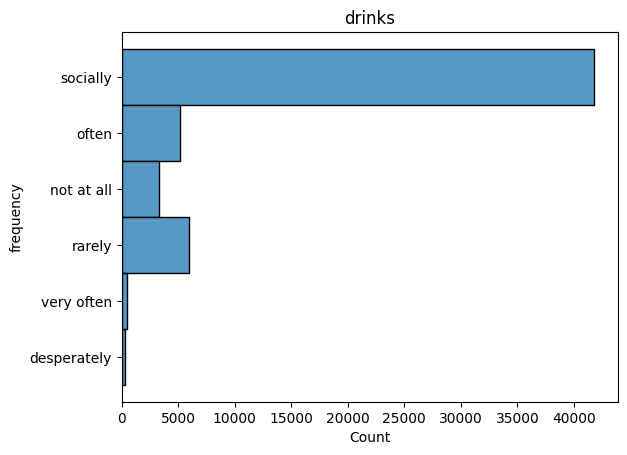

drugs
never        62.93
sometimes    12.90
often         0.68
Name: drugs, dtype: float64


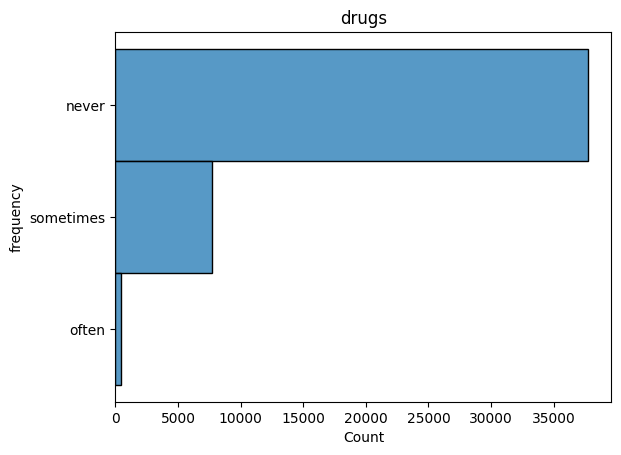

job
other                                12.66
student                               8.14
science / tech / engineering          8.09
computer / hardware / software        7.86
artistic / musical / writer           7.40
sales / marketing / biz dev           7.32
medicine / health                     6.14
education / academia                  5.86
executive / management                3.96
banking / financial / real estate     3.78
entertainment / media                 3.75
law / legal services                  2.30
hospitality / travel                  2.28
construction / craftsmanship          1.70
clerical / administrative             1.34
political / government                1.18
rather not say                        0.73
transportation                        0.61
unemployed                            0.46
retired                               0.42
military                              0.34
Name: job, dtype: float64


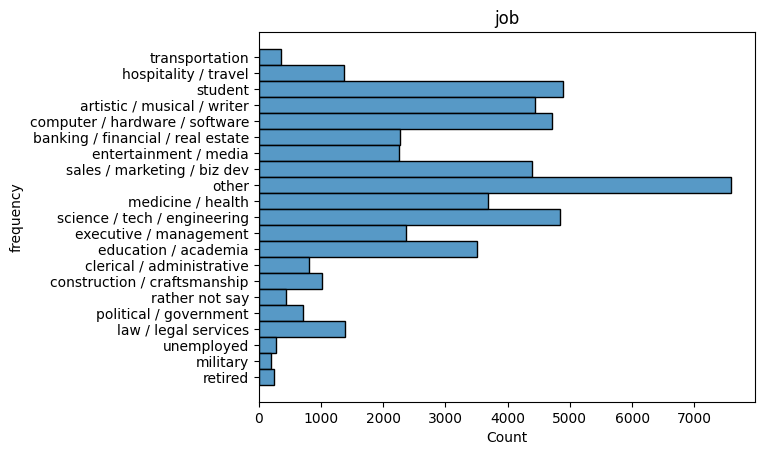

offspring
doesn't have kids                          12.61
doesn't have kids, but might want them      6.46
doesn't have kids, but wants them           5.95
doesn't want kids                           4.88
has kids                                    3.14
has a kid                                   3.14
doesn't have kids, and doesn't want any     1.89
has kids, but doesn't want more             0.74
has a kid, but doesn't want more            0.46
has a kid, and might want more              0.39
wants kids                                  0.38
might want kids                             0.30
has kids, and might want more               0.19
has a kid, and wants more                   0.12
has kids, and wants more                    0.04
Name: offspring, dtype: float64


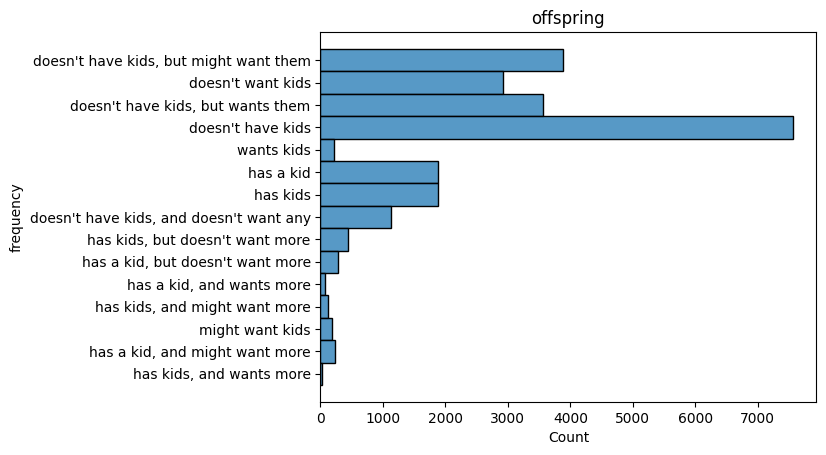

pets
likes dogs and likes cats          24.71
likes dogs                         12.05
likes dogs and has cats             7.19
has dogs                            6.90
has dogs and likes cats             3.89
likes dogs and dislikes cats        3.38
has dogs and has cats               2.46
has cats                            2.35
likes cats                          1.77
has dogs and dislikes cats          0.92
dislikes dogs and likes cats        0.40
dislikes dogs and dislikes cats     0.33
dislikes cats                       0.20
dislikes dogs and has cats          0.14
dislikes dogs                       0.07
Name: pets, dtype: float64


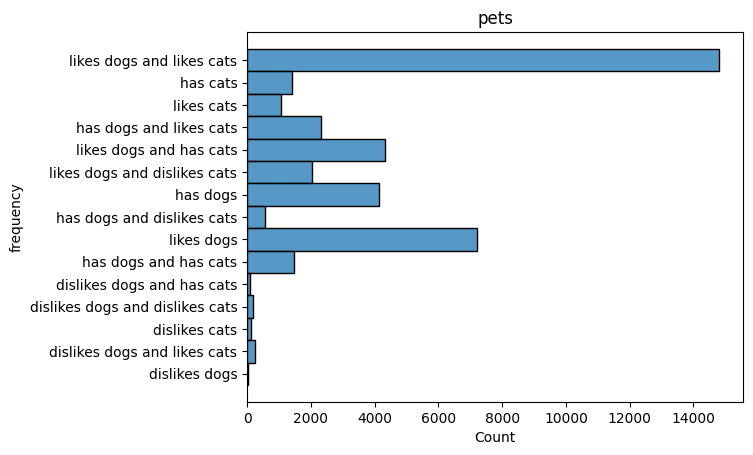

smokes
no                73.23
sometimes          6.32
when drinking      5.07
yes                3.72
trying to quit     2.47
Name: smokes, dtype: float64


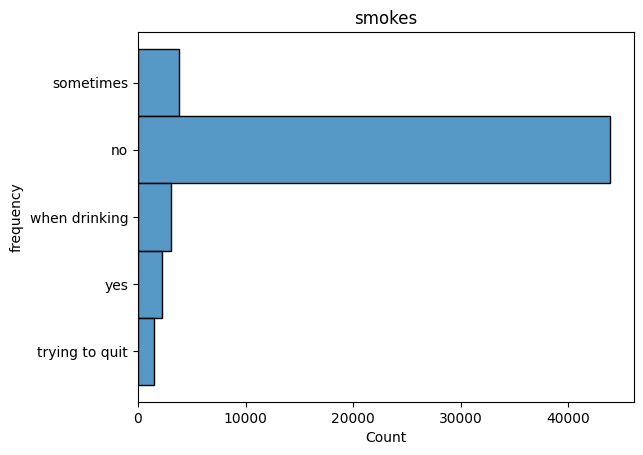

In [124]:
for feature in ok[['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
               'drugs', 'job', 'offspring', 'pets', 'smokes']]:
    print(pertentage_of_unique(ok, feature))
    plot=sns.histplot(data=ok, y=feature)
    #plt.setp(plot.get_xticklabels(), rotation=80)
    plt.title(f'{feature}')
    plt.ylabel('frequency')
    plt.show();

### Discrete Variables - with many cateories 

education
graduated from college/university    39.97
graduated from masters program       14.95
working on college/university         9.53
working on masters program            2.81
graduated from two-year college       2.55
graduated from high school            2.38
graduated from ph.d program           2.12
graduated from law school             1.87
working on two-year college           1.79
dropped out of college/university     1.66
working on ph.d program               1.64
college/university                    1.34
graduated from space camp             1.10
dropped out of space camp             0.87
graduated from med school             0.74
working on space camp                 0.74
working on law school                 0.45
two-year college                      0.37
working on med school                 0.35
dropped out of two-year college       0.32
dropped out of masters program        0.23
masters program                       0.23
dropped out of ph.d program           0.21
d

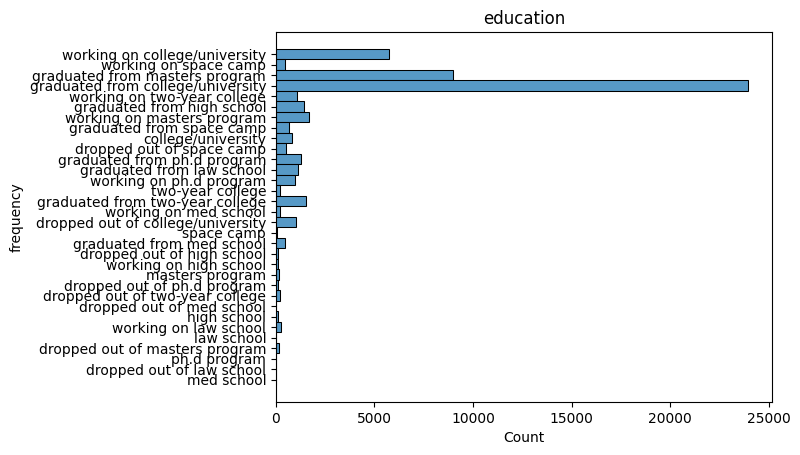

ethnicity
white                                                                                        54.77
asian                                                                                        10.23
hispanic / latin                                                                              4.71
black                                                                                         3.35
other                                                                                         2.85
                                                                                             ...  
asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin     0.00
middle eastern, native american, white, other                                                 0.00
asian, middle eastern, black, native american, hispanic / latin, white                        0.00
middle eastern, pacific islander                                                              0.00


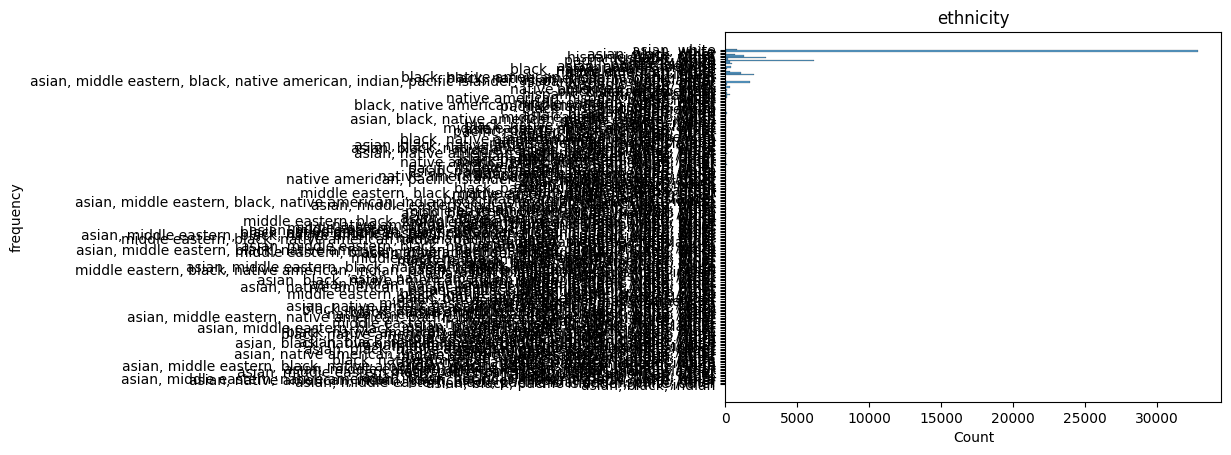

location
san francisco, california     51.82
oakland, california           12.03
berkeley, california           7.03
san mateo, california          2.22
palo alto, california          1.77
                              ...  
canyon country, california     0.00
marin city, california         0.00
magalia, california            0.00
longwood, florida              0.00
brea, california               0.00
Name: location, Length: 199, dtype: float64


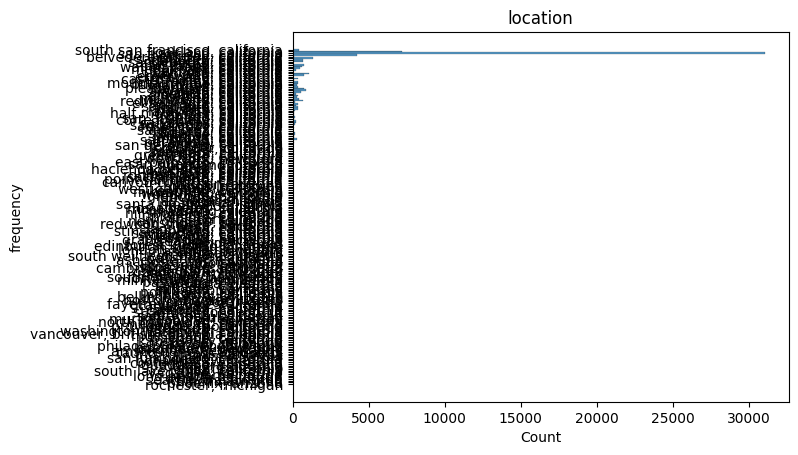

religion
agnosticism                                   4.54
other                                         4.49
agnosticism but not too serious about it      4.40
agnosticism and laughing about it             4.16
catholicism but not too serious about it      3.87
atheism                                       3.63
other and laughing about it                   3.53
atheism and laughing about it                 3.46
christianity                                  3.26
christianity but not too serious about it     3.26
other but not too serious about it            2.59
judaism but not too serious about it          2.53
atheism but not too serious about it          2.20
catholicism                                   1.77
christianity and somewhat serious about it    1.55
atheism and somewhat serious about it         1.41
other and somewhat serious about it           1.41
catholicism and laughing about it             1.21
judaism and laughing about it                 1.14
buddhism but not too s

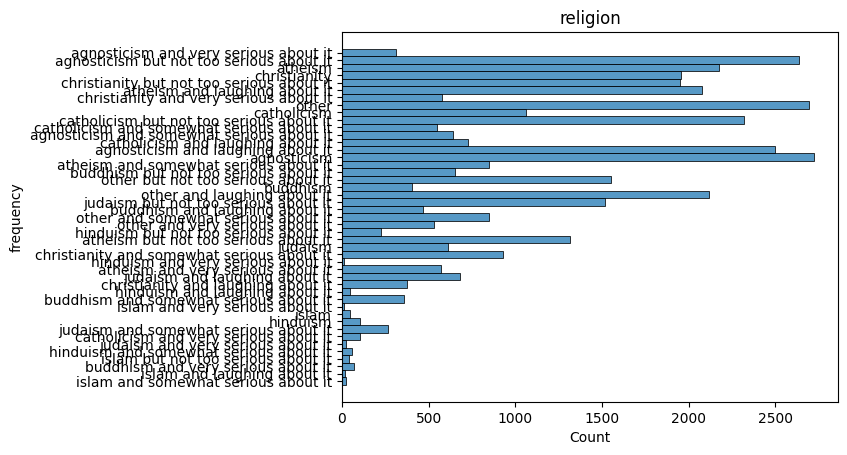

sign
gemini and it&rsquo;s fun to think about         2.97
scorpio and it&rsquo;s fun to think about        2.96
leo and it&rsquo;s fun to think about            2.82
libra and it&rsquo;s fun to think about          2.75
taurus and it&rsquo;s fun to think about         2.74
cancer and it&rsquo;s fun to think about         2.66
pisces and it&rsquo;s fun to think about         2.66
sagittarius and it&rsquo;s fun to think about    2.64
virgo and it&rsquo;s fun to think about          2.63
aries and it&rsquo;s fun to think about          2.62
aquarius and it&rsquo;s fun to think about       2.51
virgo but it doesn&rsquo;t matter                2.50
leo but it doesn&rsquo;t matter                  2.43
cancer but it doesn&rsquo;t matter               2.43
gemini but it doesn&rsquo;t matter               2.42
taurus but it doesn&rsquo;t matter               2.42
aquarius but it doesn&rsquo;t matter             2.35
libra but it doesn&rsquo;t matter                2.35
capricorn and it&rsquo;

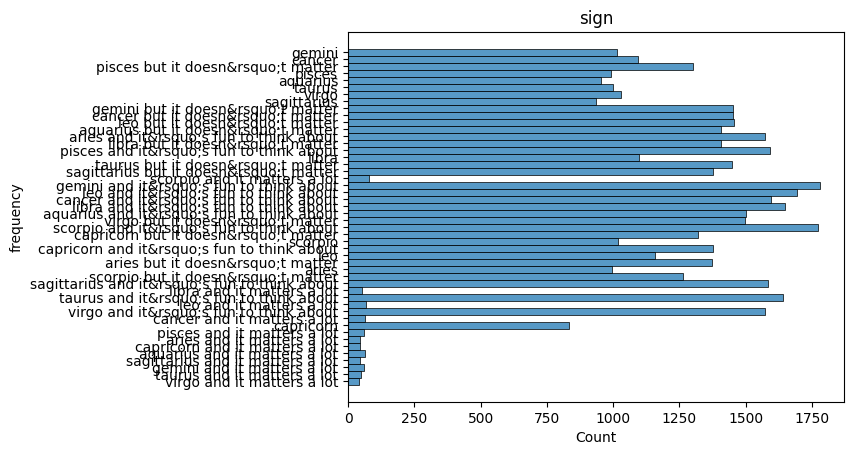

speaks
english                                                                                           36.41
english (fluently)                                                                                11.06
english (fluently), spanish (poorly)                                                               3.43
english (fluently), spanish (okay)                                                                 3.20
english (fluently), spanish (fluently)                                                             2.15
                                                                                                  ...  
english (fluently), japanese (fluently), chinese (poorly), french (poorly)                         0.00
english (fluently), japanese (fluently), chinese (okay), french (poorly)                           0.00
english (fluently), japanese (fluently), chinese (okay)                                            0.00
english (fluently), japanese (fluently), chinese (fluentl

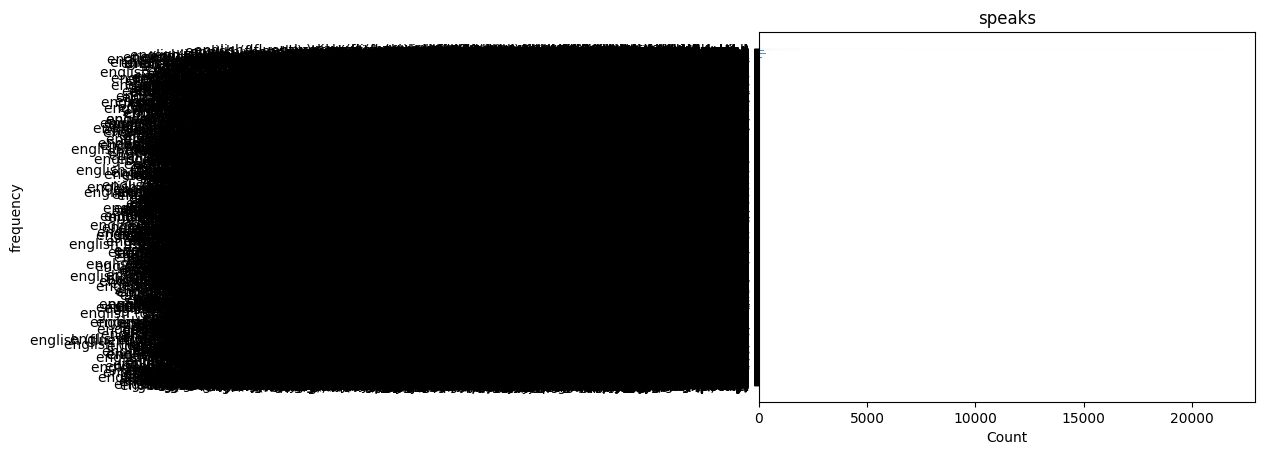

In [123]:
for feature in ok[['education', 'ethnicity', 'location','religion', 'sign', 'speaks']]:
    print(pertentage_of_unique(ok, feature))
    plot=sns.histplot(data=ok, y=feature)
    #plt.setp(plot.get_xticklabels(), rotation=80)
    plt.title(f'{feature}')
    plt.ylabel('frequency')
    plt.show();

## Quick Data Cleaning

### Replacing Nan with Not Mentioned

In [6]:
def replace_nan(ok, column):
    ok[column].replace(float('nan'), "NotDisclosed", inplace=True)
    return ok

In [ ]:
replace_nan(ok, "body_type")
replace_nan(ok, "drinks")
replace_nan(ok, "drugs")
replace_nan(ok, "job")
replace_nan(ok, "smokes")

### Ethnicity

In [157]:
def split_ethnicity(ok):
    # Dictionary to store binary ethnicity columns
    cols = {}

    # Iterate through all unique values in the "ethnicity" column
    for e in ok["ethnicity"].unique():
        if isinstance(e, float):  # If it's NaN (float type), continue without processing
            continue  
        for et in e.split(", "):  # Split multi-ethnic values (e.g., "Asian, Hispanic")
            if et not in cols.keys():  # If the ethnicity is not already in the dictionary
                cols[et] = []  # Initialize an empty list for this ethnicity

    # List to store NaN status (1 if NaN, 0 otherwise)
    nan_status = []

    # Loop through the "ethnicity" column again to assign 1s and 0s
    for e in ok["ethnicity"]:
        is_nan = isinstance(e, float)  # Check if the value is NaN
        nan_status.append(1 if is_nan else 0)  # Append 1 for NaN, 0 otherwise

        trues = [] if is_nan else e.split(", ")  # If NaN, use an empty list
        for k in cols.keys():  # Iterate through all unique ethnicity categories
            val = 1 if k in trues else 0  # Assign 1 if the person has this ethnicity, otherwise 0
            cols[k].append(val)  # Append the value (1 or 0) to the corresponding list

    # Add the new binary columns to the DataFrame
    for k in cols.keys():
        tk = "is_" + k.replace(" ", "-")  # Format the column name (e.g., "is_Asian")
        ok[tk] = cols[k]  # Assign the binary list to the new column

    # Add the is_ethnicity_nan column to track missing values
    ok["is_ethnicity_nan"] = nan_status

    return ok  # Return the updated DataFrame

In [158]:
split_ethnicity(ok)

age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                          education  \
0        socially      never      working on college/university   
1           often  sometimes              working on space camp   
2        socially        NaN     graduated from masters program   
3        socially        NaN      working on college/university   
4        socially      never  graduated from college/university   
...           ...        ...                                ...   
59941    socially      never  graduated from college/university   
59942       often  sometimes      working on college/university   
59943  not at all      never     graduated from masters program   
59944    socially      often      working on college/university   
59945    socially        NaN     graduated from masters program   

                 ethnicity  ...  is_asian  is_white is_black is_other  \
0             asian, white  ...         1         1        0        0   
1                    white  ...         0         1        0        0   
2                      NaN  ...         0         0        0        0   
3                    white  ...         0         1        0        0   
4      asian, black, other  ...         1         0        1        1   
...                    ...  ...       ...       ...      ...      ...   
59941                  NaN  ...         0         0        0        0   
59942         white, other  ...         0         1        0        1   
59943                asian  ...         1         0        0        0   
59944         asian, black  ...         1         0        1        0   
59945                white  ...         0         1        0        0   

      is_hispanic-/-latin is_pacific-islander is_native-american  \
0                       0                   0                  0   
1                       0                   0                  0   
2                       0                   0                  0   
3                       0                   0                  0   
4                       0                   0                  0   
...                   ...                 ...                ...   
59941                   0                   0                  0   
59942                   0                   0                  0   
59943                   0                   0                  0   
59944                   0                   0                  0   
59945                   0                   0                  0   

      is_middle-eastern is_indian is_ethnicity_nan  
0                     0         0                0  
1                     0         0                0  
2                     0         0                1  
3                     0         0                0  
4                     0         0                0  
...                 ...       ...              ...  
59941                 0         0                1  
59942                 0         0                0  
59943                 0         0                0  
59944                 0         0                0  
59945       

In [171]:
ethnicity_cols = ["is_asian", "is_white", "is_black", "is_other", "is_hispanic-/-latin", "is_pacific-islander",
             "is_native-american", "is_middle-eastern", "is_indian", "is_ethnicity_nan"]

In [181]:
columns = [0, 1]
print("{:<25} {:<10} {:<10}".format("ethnicity", "No", "Yes"))  # Print header
print("-" * 50)

for col in ethnicity_cols:
    per_data = pertentage_of_unique(ok, col)  # Get percentage data

    # Get values, defaulting to 0 if the key doesn't exist
    no_val = per_data.get(0, 0)
    yes_val = per_data.get(1, 0)

    # Print the row directly
    print(f"{col:<25} {no_val:<10} {yes_val:<10}")

ethnicity                 No         Yes       
--------------------------------------------------
is_asian                  86.31      13.69     
is_white                  36.81      63.19     
is_black                  94.45      5.55      
is_other                  94.05      5.95      
is_hispanic-/-latin       91.06      8.94      
is_pacific-islander       97.54      2.46      
is_native-american        97.89      2.11      
is_middle-eastern         98.42      1.58      
is_indian                 97.58      2.42      
is_ethnicity_nan          90.52      9.48      


In [189]:
# Excluding is_ethinicity_nan for further analysis
ethnicity_cols = ["is_asian", "is_white", "is_black", "is_other", "is_hispanic-/-latin", "is_pacific-islander",
             "is_native-american", "is_middle-eastern", "is_indian"]

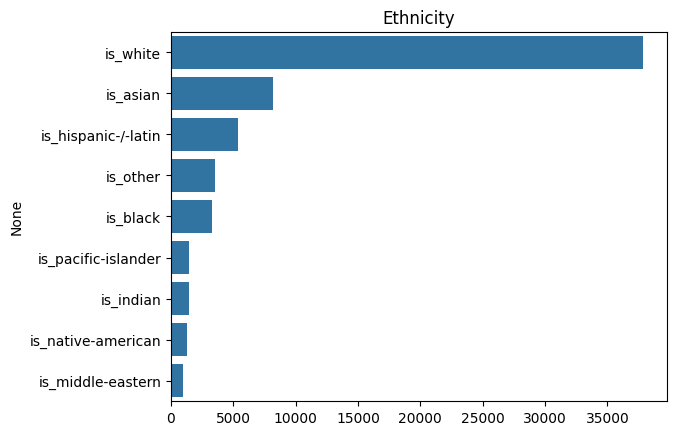

In [191]:
# number of users belonging to each ethnicity
ethnicity_count = ok[ethnicity_cols].sum()
sns.barplot(x=ethnicity_count.values, y=ethnicity_count.index, order=ethnicity_count.sort_values(ascending=False).index)
plt.title("Ethnicity")
plt.show()

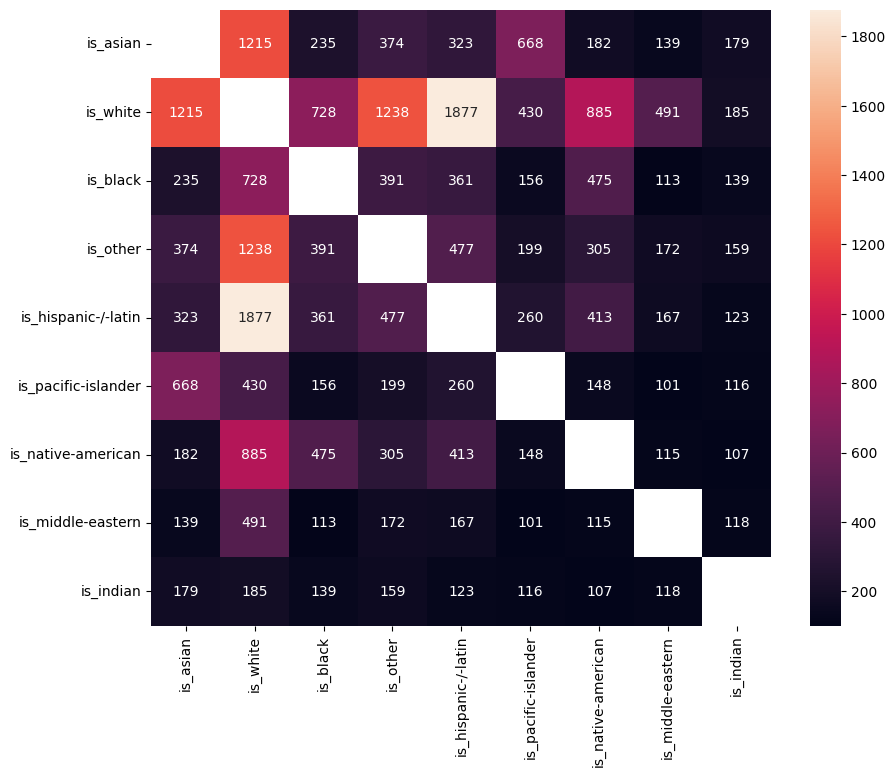

In [192]:
# Find count of users with mixed ethnicity (in pair)
plot_heatmap(ok, ethnicity_cols, (10, 8), np.identity(len(ethnicity_cols)))

In [193]:
no_ethnicity_per_user = ok[ethnicity_cols].sum(axis=1)
no_ethnicity_per_user.describe()

count    59946.000000
mean         1.058886
std          0.629973
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
dtype: float64

In [194]:
no_ethnicity_per_user.unique()

array([2, 1, 0, 3, 4, 9, 5, 6, 8, 7])

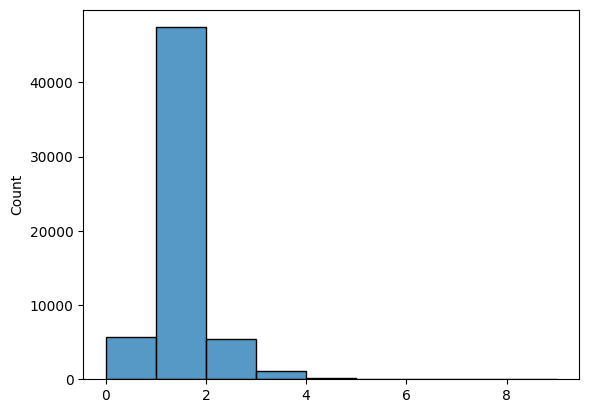

In [195]:
# histogram of number of ethnicity user beflong to
sns.histplot(no_ethnicity_per_user, bins=9)
plt.show()

### Location

In [3]:
def split_location(ok):
    city = []
    state = []
    for e in ok["location"]:
        sp = e.split(", ")
        if len(sp) == 3:
            city.append(sp[0])
            state.append(sp[2])
        else:
            city.append(sp[0])
            state.append(sp[1])
    ok["city"] = city
    ok["state"] = state
    return ok

In [4]:
split_location(ok)

age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                          education  \
0        socially      never      working on college/university   
1           often  sometimes              working on space camp   
2        socially        NaN     graduated from masters program   
3        socially        NaN      working on college/university   
4        socially      never  graduated from college/university   
...           ...        ...                                ...   
59941    socially      never  graduated from college/university   
59942       often  sometimes      working on college/university   
59943  not at all      never     graduated from masters program   
59944    socially      often      working on college/university   
59945    socially        NaN     graduated from masters program   

                 ethnicity  ...  \
0             asian, white  ...   
1                    white  ...   
2                      NaN  ...   
3                    white  ...   
4      asian, black, other  ...   
...                    ...  ...   
59941                  NaN  ...   
59942         white, other  ...   
59943                asian  ...   
59944         asian, black  ...   
59945                white  ...   

                                                  essay2  \
0      making people laugh. ranting about a good salt...   
1      being silly. having ridiculous amonts of fun w...   
2      improvising in different contexts. alternating...   
3      playing synthesizers and organizing books acco...   
4      creating imagery to look at: http://bagsbrown....   
...                                                  ...   
59941  i make an outstanding osso bucco. i am also ve...   
59942  filmmaking, photography, graphic design, web d...   
59943  - looking at things objectively - getting thin...   
59944                                          listening   
59945  i'm a great bullshitter. i don't know what it ...   

                                                  essay3  \
0      the way i look. i am a six foot half asian, ha...   
1                                                    NaN   
2      my large jaw and large glasses are the physica...   
3                      socially awkward but i do my best   
4                i smile a lot and my inquisitive nature   
...                                                  ...   
59941  i am told that people notice my smile, eyes an...   
59942                                dude, i don't know.   
59943  i'm quiet until i get used to the environment ...   
59944  it used to be the hair until i mowed it off bu...   
59945  either that i am funny/sarcastic, or that i am...   

                                                  essay4  \
0      books: absurdistan, the republic, of mice and ...   
1      i am die hard christopher moore fan. i don't r...   
2      okay this is where the cultural matrix gets so...   
3      bataille, celine, beckett. . . lynch, jarmusch...   
4      music: bands, rappers, musicians at the moment...   
...                                                  ...   
59941 